In [48]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from skimage.feature import hog
%matplotlib inline

In [23]:
vehicle_files = glob.glob('../vehicles/**/*.png')
vehicle_imgs = [cv2.cvtColor(cv2.imread(v), cv2.COLOR_BGR2RGB) for v in vehicle_files]
non_vehicle_files = glob.glob('../non-vehicles/**/*.png')
non_vehicle_imgs = [cv2.cvtColor(cv2.imread(v), cv2.COLOR_BGR2RGB) for v in non_vehicle_files]
num_vehicles, num_non_vehicles = len(vehicle_imgs), len(non_vehicle_imgs)

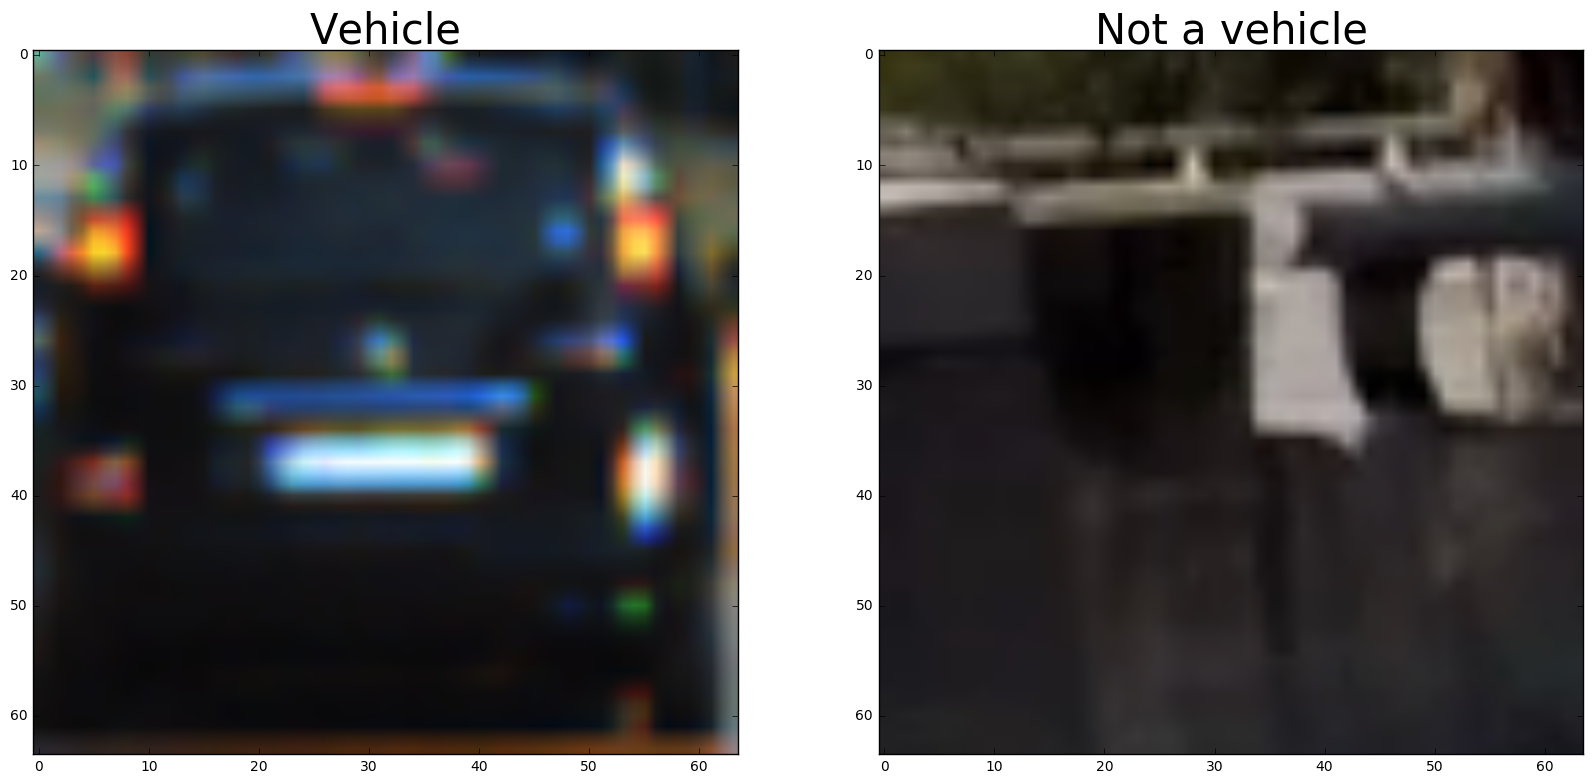

In [24]:
def show_two_images(img1, img2, title1, title2):
    cmap = None if len(img1.shape) == 3 else 'gray'
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img1, cmap=cmap)
    ax1.set_title(title1, fontsize=30)
    ax2.imshow(img2, cmap=cmap)
    ax2.set_title(title2, fontsize=30)

ind1, ind2 = np.random.randint(0, len(non_vehicle_imgs), 2)
show_two_images(vehicle_imgs[ind1], non_vehicle_imgs[ind2], 'Vehicle', 'Not a vehicle')


In [34]:
x = np.array(vehicle_imgs + non_vehicle_imgs)
y = np.array([1] * num_vehicles + [0] * num_non_vehicles)
print(x.shape, y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

(17760, 64, 64, 3) (17760,)
[0 0 1 ..., 1 0 0]


In [47]:
color_conversions = [cv2.COLOR_RGB2HSV, cv2.COLOR_RGB2LUV, cv2.COLOR_RGB2HLS, cv2.COLOR_RGB2YUV, cv2.COLOR_RGB2YCrCb]
def bin_spatial(img, color_conversion=cv2.COLOR_RGB2HSV, size=(16, 16)):
    # Convert image to new color space (if specified)
    if color_conversion is not None:
        feature_image = cv2.cvtColor(img, color_conversion)
    else:
        feature_image = np.copy(img)
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

print(len(bin_spatial(x[2])))

768


In [51]:
orient = 9
pix_per_cell = 8
cell_per_block = 2
features = hog(x[2][:,:,2], orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
               cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
               visualise=False, feature_vector=True)
print(features.shape)

(1764,)
